<a href="https://colab.research.google.com/github/AmineBAA/Deep-Insights_Neural-Network/blob/main/Deep_Insights_for_VGG_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mutual Information in Deep Neural Network

In [5]:
from __future__ import print_function  # print('me') instead of print 'me'
from __future__ import division  # 1/2 == 0.5, not 0

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from tensorflow.keras.utils import load_img
from PIL import Image

In [8]:
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'nearest'

Mutual Information

## Mutual information of Feature Maps: Case of VGG 16

In [9]:
from tensorflow.keras.layers import Conv2D, Dense, BatchNormalization, Activation, MaxPool2D, GlobalAveragePooling2D, Add
from tensorflow.keras import Model
import tensorflow.keras as keras
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import regularizers

In [10]:

# load vgg model
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# summarize the model
model.summary()

553467096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [11]:

# summarize filter shapes
for layer in model.layers:

  if 'conv' not in layer.name:
    continue


In [12]:

# get filter weights
filters, biases = layer.get_weights()
print(layer.name, filters.shape)

predictions (4096, 1000)


In [13]:
# summarize filter shapes
for layer in model.layers:
 # check for convolutional layer
 if 'conv' not in layer.name:
   continue

 # get filter weights
 filters, biases = layer.get_weights()
 print(layer.name, filters.shape)

block1_conv1 (3, 3, 3, 64)
block1_conv2 (3, 3, 64, 64)
block2_conv1 (3, 3, 64, 128)
block2_conv2 (3, 3, 128, 128)
block3_conv1 (3, 3, 128, 256)
block3_conv2 (3, 3, 256, 256)
block3_conv3 (3, 3, 256, 256)
block4_conv1 (3, 3, 256, 512)
block4_conv2 (3, 3, 512, 512)
block4_conv3 (3, 3, 512, 512)
block5_conv1 (3, 3, 512, 512)
block5_conv2 (3, 3, 512, 512)
block5_conv3 (3, 3, 512, 512)


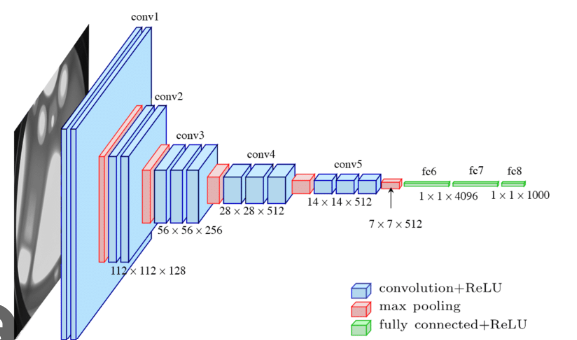

In [14]:
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

1/1 [==============================] - 1s 865ms/step


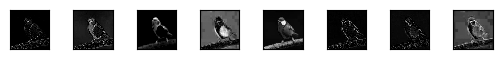

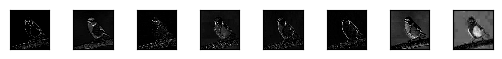

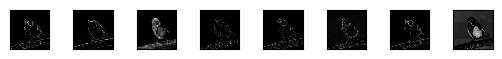

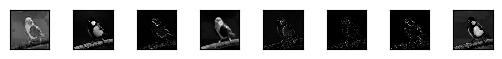

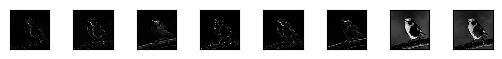

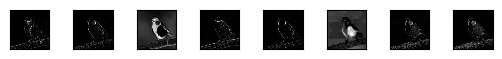

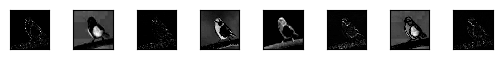

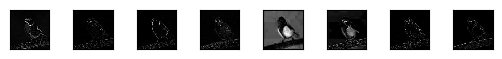

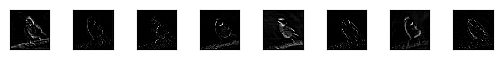

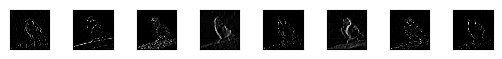

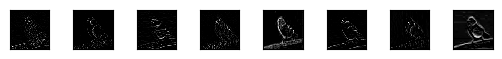

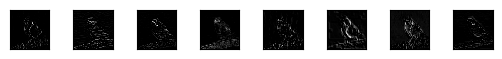

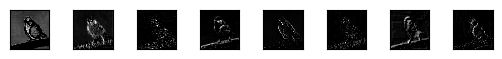

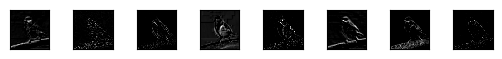

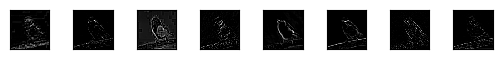

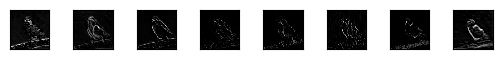

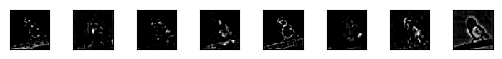

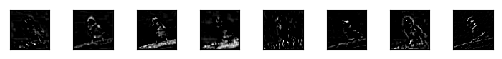

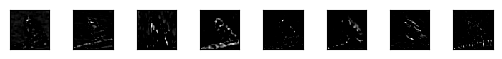

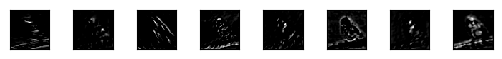

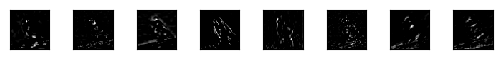

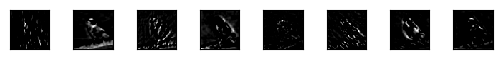

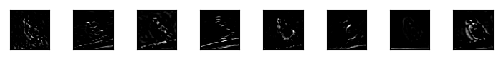

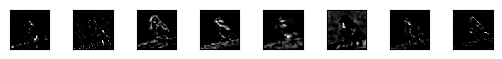

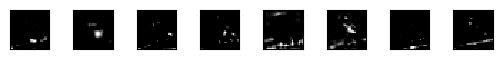

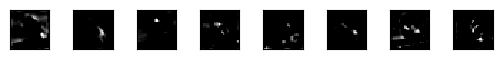

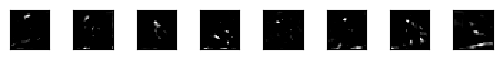

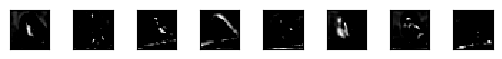

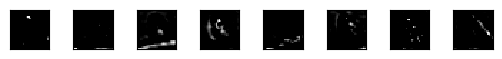

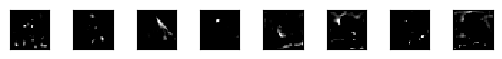

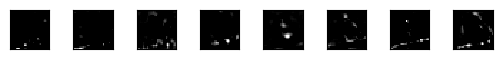

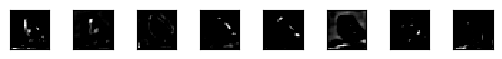

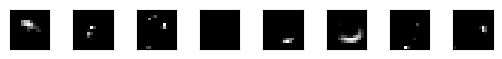

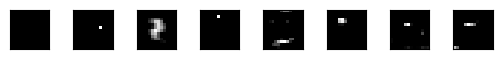

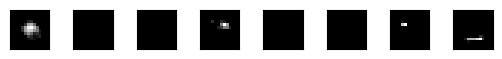

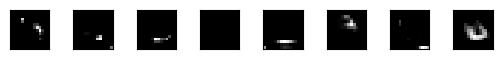

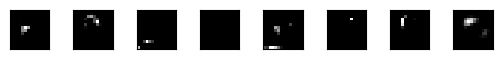

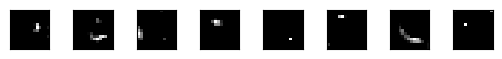

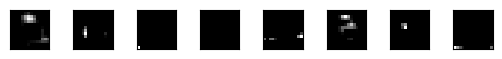

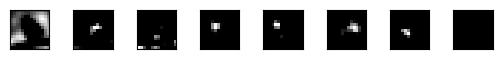

In [ ]:

# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
ixs = [2, 5, 9, 13, 17]
outputs = [model.layers[i].output for i in ixs]
model = Model(inputs=model.inputs, outputs=outputs)
# load the image with the required shape
img = Image.open('/content/Bird_1.jfif')
img=img.resize((224, 224))
# convert the image to an array
img = np.asarray(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot the output from each block
square = 8
for fmap in feature_maps:
   ix = 1
   # plot all 64 maps in an 8x8 squares
   for _ in range(square):
     for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale

        pyplot.imshow(fmap[0, :, :, ix-1], cmap='gray')
        ix += 1
      # show the figure
     pyplot.show()


In [ ]:
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[5].output)
model.summary()
img = load_img('/content/Bird_1.jfif', target_size=(224, 224))
# convert the image to an array
img = tf.keras.utils.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
Total params: 260,160
Trainable params: 260,160
Non-trainab

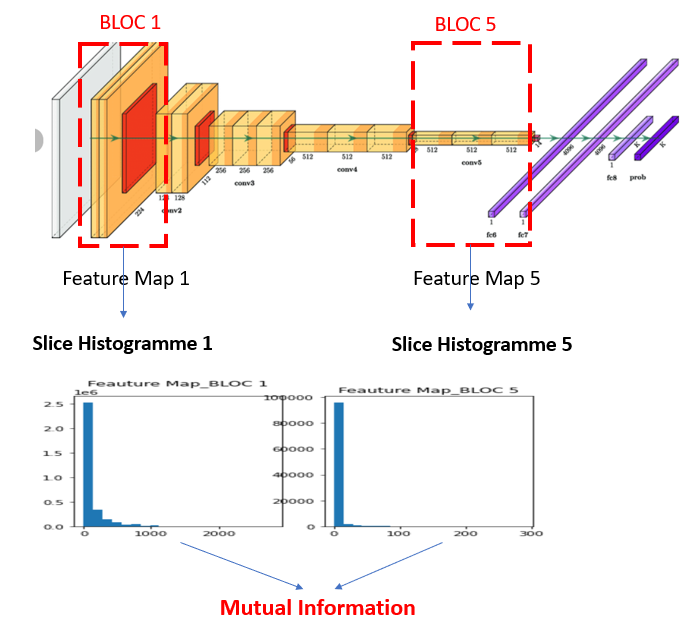

In [ ]:
# Activations in feature map
features = np.reshape(feature_maps, (1605632))

In [ ]:
features.shape, features

((1605632,),
 array([ 18.507534,  55.965023,  31.108969, ..., 213.61253 ,   0.      ,
          0.      ], dtype=float32))

In [22]:
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[5].output)
img = load_img('/content/Bird_8.jpg', target_size=(224, 224))
# convert the image to an array
img = tf.keras.utils.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)


bird8 = np.reshape(feature_maps, (1605632))


1/1 [==============================] - 0s 417ms/step


In [24]:
merged_array = np.column_stack((bird1,bird2))

In [32]:
merged_array = np.column_stack((merged_array,bird8))
merged_array.shape

(1605632, 8)

In [33]:
merged_array

array([[ 23.258583,   0.      ,  35.08955 , ...,  24.526783,  25.124142,
          0.      ],
       [ 48.631508, 133.99304 , 235.45746 , ..., 164.67625 , 145.2768  ,
        416.43942 ],
       [  9.514229,  33.60336 , 154.14786 , ..., 194.88028 ,  30.176346,
          0.      ],
       ...,
       [165.63753 , 495.9511  , 450.06525 , ...,  72.11646 , 452.49875 ,
         85.49076 ],
       [  0.      ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [475.7486  ,   0.      ,   0.      , ...,   0.      ,   0.      ,
        220.08034 ]], dtype=float32)

In [34]:
X_A=pd.DataFrame(np.transpose(merged_array))

In [36]:
X_A.head()

,0,1,2,3,4,5,6,7,8,9,...,1605622,1605623,1605624,1605625,1605626,1605627,1605628,1605629,1605630,1605631
0,23.258583,48.631508,9.514229,0.0,55.344490,0.000000,0.000000,0.000000,40.951466,101.524818,...,423.422485,0.0,51.601147,0.000000,0.0,0.0,0.0,165.637527,0.0,475.748596
1,0.000000,133.993042,33.603359,0.0,79.514587,0.000000,460.387207,124.272934,0.000000,247.763687,...,302.533264,0.0,451.146301,0.000000,0.0,0.0,0.0,495.951111,0.0,0.000000
2,35.089550,235.457458,154.147858,0.0,130.478241,0.000000,0.000000,0.000000,0.000000,348.818298,...,536.975281,0.0,278.541504,37.614273,0.0,0.0,0.0,450.065247,0.0,0.000000
3,12.280940,346.799591,130.564133,0.0,83.553909,22.455355,947.846069,225.387817,0.000000,340.553619,...,707.106750,0.0,381.714722,303.729645,0.0,0.0,0.0,421.610565,0.0,0.000000
4,18.871283,106.964455,26.473873,0.0,27.447609,5.490485,343.806244,99.015602,0.000000,131.872650,...,414.459747,0.0,180.164703,3.839933,0.0,0.0,0.0,211.285477,0.0,0.000000


In [39]:
Y_A=np.full((8, ),1)

In [42]:
Y_A=pd.DataFrame(Y_A)

In [43]:
Y_A.columns = ['y']

In [50]:
df=[X_A,Y_A]

In [54]:
X_concept=pd.concat(df,axis=1)

In [ ]:
########""

In [62]:
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[5].output)
img = load_img('/content/Simple_8.jpg', target_size=(224, 224))
# convert the image to an array
img = tf.keras.utils.img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)


simple8 = np.reshape(feature_maps, (1605632))

1/1 [==============================] - 0s 247ms/step


In [63]:
merged_array = np.column_stack((simple1,simple2))

In [69]:
merged_array = np.column_stack((merged_array,simple8))
merged_array.shape

(1605632, 8)

In [70]:
X_B=pd.DataFrame(np.transpose(merged_array))

In [71]:
Y_B=np.full((8, ),0)

In [73]:
Y_B=pd.DataFrame(Y_B)
Y_B.columns = ['y']

In [74]:
df_2=[X_B,Y_B]

In [75]:
X_normal=pd.concat(df_2,axis=1)

In [76]:
dataset=pd.concat([X_concept,X_normal],axis=0)

In [77]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,1605623,1605624,1605625,1605626,1605627,1605628,1605629,1605630,1605631,y
0,23.258583,48.631508,9.514229,0.0,55.344490,0.000000,0.000000,0.000000,40.951466,101.524818,...,0.0,51.601147,0.000000,0.0,0.0,0.0,165.637527,0.0,475.748596,1
1,0.000000,133.993042,33.603359,0.0,79.514587,0.000000,460.387207,124.272934,0.000000,247.763687,...,0.0,451.146301,0.000000,0.0,0.0,0.0,495.951111,0.0,0.000000,1
2,35.089550,235.457458,154.147858,0.0,130.478241,0.000000,0.000000,0.000000,0.000000,348.818298,...,0.0,278.541504,37.614273,0.0,0.0,0.0,450.065247,0.0,0.000000,1
3,12.280940,346.799591,130.564133,0.0,83.553909,22.455355,947.846069,225.387817,0.000000,340.553619,...,0.0,381.714722,303.729645,0.0,0.0,0.0,421.610565,0.0,0.000000,1
4,18.871283,106.964455,26.473873,0.0,27.447609,5.490485,343.806244,99.015602,0.000000,131.872650,...,0.0,180.164703,3.839933,0.0,0.0,0.0,211.285477,0.0,0.000000,1


## Autoencoder